# Homework 1
## PSTAT 134 
For this assignment, you may use R or Python, or a combination of both, to complete both case studies. You can use the code that we include in Labs 1 and 2 to answer these questions. You also may need to use other functions. I encourage you to make use of our textbook(s) and use the Internet to help you solve these problems. You can also work together with your classmates. If you do work together, you should provide the names of those classmates below.

In [116]:
#Prepare libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Case Study: New York Times Ad Impressions (Simulated)
There are 10 data sets in the /data subdirectory names nyt1.csv, nyt2.csv, ..., nyt10.csv. Each file represents one day's worth of simulate data on ad impressions and clicks on the [New York Times home-page](https://www.nytimes.com/). Each row represents a single user. There are five colums total:
- Age (user's age)
- Gender (user's gender, coded as 0 = female, 1 = male)
- Impressions (number of ads displayed during the user's visit)
- Clicks (number of clicks made by the user)
- Signed_In (wheter or not the user was sign in as a member)

Load a **single data file** and do the following:

1. Create a new variable, *age_group* that categorizes users in the following age groups: < 18, 18-24, 25-34, 35-44, 45-54, 55-64, and 65+

In [120]:
#Loading in the data file 
ny_data_1 = pd.read_csv("data/nyt1.csv")
ny_data_1.head(1)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1


In [122]:
#Creating age_group to categorize users
age_bins = [-1, 17, 24, 34, 44, 54, 65, float('inf')]
age_labels = ['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

ny_data_1['age_group'] = pd.cut(ny_data_1['Age'], 
                                bins = age_bins, 
                                labels = age_labels, 
                                right = True)
ny_data_1.head(1)

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44


2. Plot the distributions of impressions and "click-through rate" for all 6 age categories. (Click-through rate is defined as the number of clicks divided by the number of impressions)

In [125]:
#Creating click_thru_rate variable to plot
ny_data_1['click_thru_rate'] = ny_data_1['Clicks']/ny_data_1['Impressions']
ny_data_1.isnull().sum()

Age                   0
Gender                0
Impressions           0
Clicks                0
Signed_In             0
age_group             0
click_thru_rate    3066
dtype: int64

In [127]:
#Replacing NaN values with 0 as 0 impressions would result in 0 clicks anyways
ny_data_1['click_thru_rate'].fillna(0, inplace=True)  

In [166]:
ny_data_1.describe()

,Age,Gender,Impressions,Clicks,Signed_In,click_thru_rate
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930,0.018347
std,23.607034,0.481997,2.239349,0.309973,0.457851,0.068820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000,1.000000


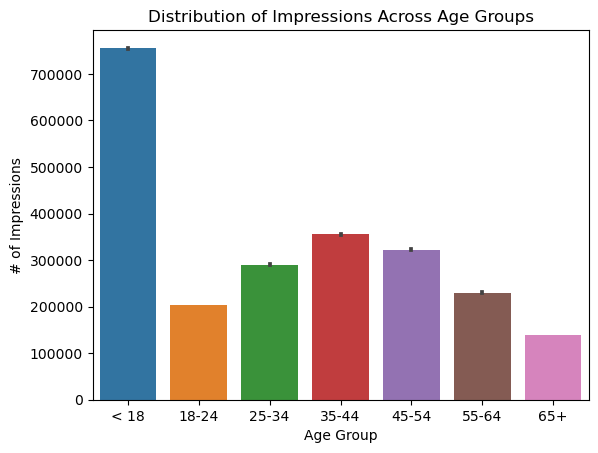

In [162]:
sns.barplot(data = ny_data_1, x = 'age_group', y = 'Impressions', estimator = sum)
plt.title("Distribution of Impressions Across Age Groups"), plt.xlabel('Age Group'), plt.ylabel('# of Impressions');

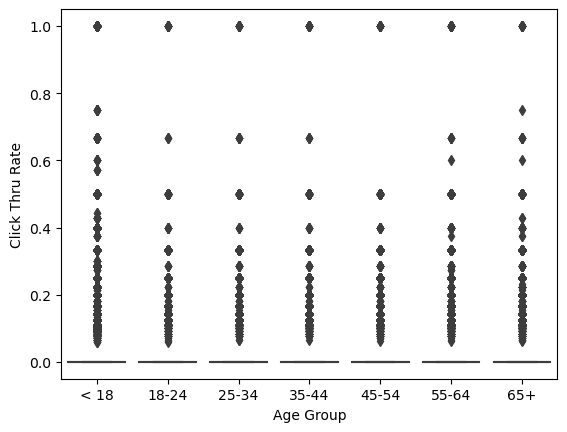

In [171]:
sns.boxplot(data = ny_data_1, x = 'age_group', y = 'click_thru_rate')
plt.xlabel("Age Group"), plt.ylabel("Click Thru Rate");

3. Create a new variable to categorize users based on their click behavior. Explain what decisions you make and why.

> After using .describe() and based on the graph above, it can be seen that average click-through rates are on average, really low (w/ a mean of 1.8 %). It is important to note that this number may have been brought down from users that never saw any ads (0 impressions) which would automatically make them a 0% CTR. The following will be taken into account when creating our categories but before doing that, further analysis of CTR must be done.

In [188]:
avg_click_thru_rate = ny_data_1.groupby('age_group')['click_thru_rate'].mean()
print(avg_click_thru_rate)

age_group
< 18     0.028337
18-24    0.010658
25-34    0.010081
35-44    0.010219
45-54    0.009889
55-64    0.020325
65+      0.029724
Name: click_thru_rate, dtype: float64


In [190]:
std_click_thru_rate = ny_data_1.groupby('age_group')['click_thru_rate'].std()
print(std_click_thru_rate)

age_group
< 18     0.085287
18-24    0.052954
25-34    0.050704
35-44    0.050962
45-54    0.049822
55-64    0.071814
65+      0.084013
Name: click_thru_rate, dtype: float64


> Our click_through rate categories will be as follows:
> - No Impression: This is for users that were never presented ads in the first place (0 impressions)
> - View Only: For users that saw ads but did not click through
> - Occasional: For users that had a click_thru_rate of < .1
> - Frequent: For users with a click_thru_rate of >= .1
>
> .1 was chosen as most users fell under this CTR, and a CTR over would prove to be frequent relative to the population average.

In [203]:
#Used Chat-gpt w/ prompt: Create a function to apply the following conditions "" to create new variable click_behavior
def categorize_click_behavior(row):
    if row['Impressions'] == 0 and row['Clicks'] == 0:
        return 'No Impression'
    elif row['Clicks'] == 0 and row['Impressions'] > 0:
        return 'View Only'
    elif row['click_thru_rate'] < 0.1:
        return 'Occasional'
    else:
        return 'Frequent'

In [212]:
ny_data_1['click_behavior'] = ny_data_1.apply(categorize_click_behavior, axis = 1)
#Looking through random subset of rows to examine change
ny_data_1.iloc[3000:3006]

,Age,Gender,Impressions,Clicks,Signed_In,age_group,click_thru_rate,click_behavior
3000,42,1,4,0,1,35-44,0.000000,View Only
3001,40,1,5,0,1,35-44,0.000000,View Only
3002,51,0,5,0,1,45-54,0.000000,View Only
3003,32,1,7,0,1,25-34,0.000000,View Only
3004,46,0,3,0,1,45-54,0.000000,View Only
3005,62,1,3,1,1,55-64,0.333333,Frequent


4. Explore the data and make visual and quantitative comparisons across user segments/demographics to answer the following:
    - How do < 18 year old males differ from < 18 year old females in terms of clicks & impressions
    - How does the distributions of click-through rate for users who are signed in differ from the distributions for those who are not signed in?
    - Are certain age groups more likely to be signed in than others? Which ones?

In [313]:
under_18_data = ny_data_1[ny_data_1['age_group'] == '< 18']
under_18_data['Gender'] = under_18_data['Gender'].map({0: 'Female', 1: 'Male'});

C:\Users\Billy Dang\AppData\Local\Temp\ipykernel_23272\166013795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_18_data['Gender'] = under_18_data['Gender'].map({0: 'Female', 1: 'Male'});


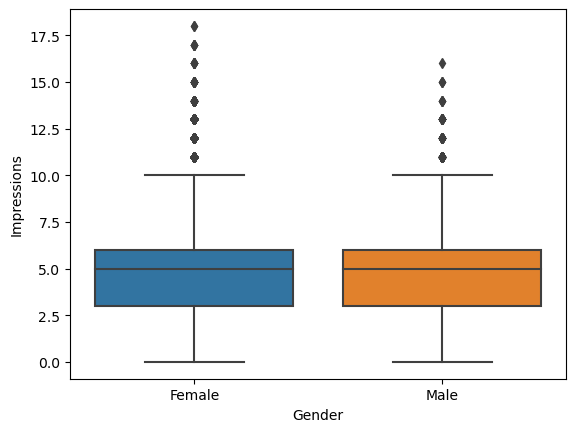

In [315]:
sns.boxplot(data = under_18_data, x = 'Gender', y = 'Impressions');

In [242]:
gender_avg_impressions = under_18_data.groupby('Gender')['Impressions'].mean().reset_index()
print(gender_avg_impressions)

   Gender  Impressions
0       0     4.999738
1       1     5.009398


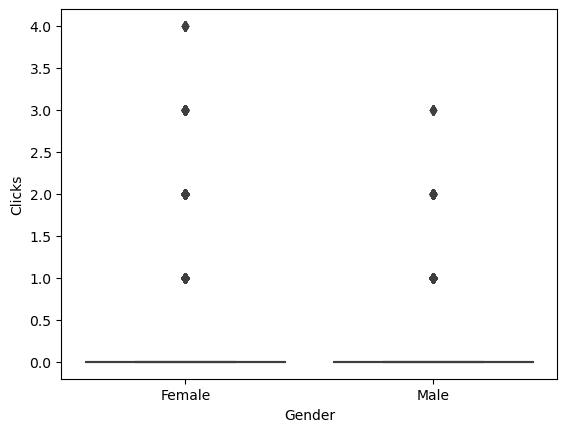

In [317]:
sns.boxplot(data = under_18_data, x = 'Gender', y = 'Clicks');

In [244]:
gender_avg_clicks = under_18_data.groupby('Gender')['Clicks'].mean().reset_index()
print(gender_avg_clicks)

   Gender    Clicks
0       0  0.142531
1       1  0.145935


> We see that within the < 18 age group, there is negligible difference within the average click and impression rate between females and males.

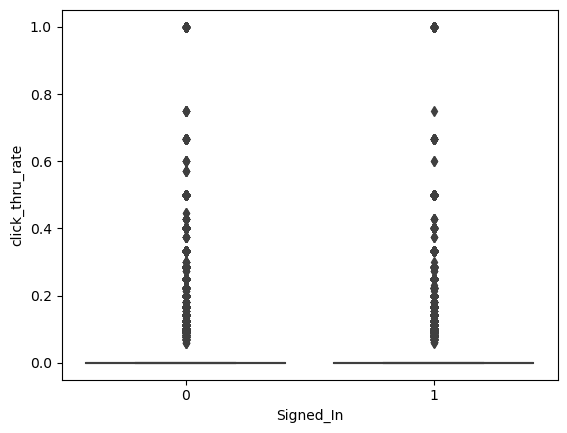

In [319]:
sns.boxplot(data = ny_data_1, x = 'Signed_In', y = 'click_thru_rate');

In [263]:
signed_in_summary = ny_data_1[ny_data_1['Signed_In'] == 1]['click_thru_rate'].describe()
signed_out_summary = ny_data_1[ny_data_1['Signed_In'] == 0]['click_thru_rate'].describe()

print(signed_in_summary,'\n', signed_out_summary)

count    321335.000000
mean          0.014159
std           0.060090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click_thru_rate, dtype: float64 
 count    137106.000000
mean          0.028163
std           0.085066
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click_thru_rate, dtype: float64


> We see that on average, signed in users have a lower CTR (1.42%) and std of that CTR (6%) while users who did not sign in had an average CTR of (2.81%) and std of that CTR (8.5%). It is important to note there were almost triple the number of signed in users, which may affect averages.

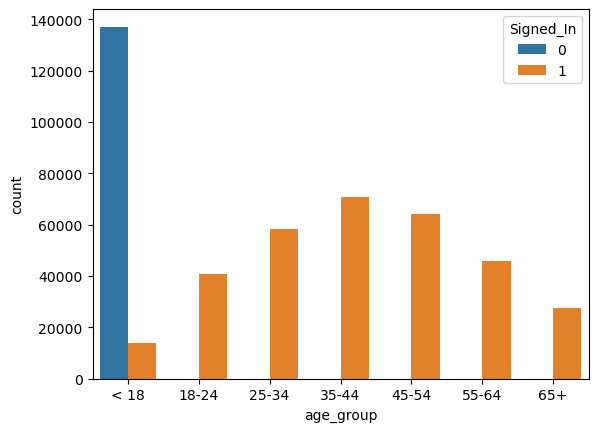

In [272]:
signed_in_age_count = ny_data_1.groupby(['age_group', 'Signed_In']).size().reset_index(name = 'count')

sns.barplot(x = 'age_group',
            y = 'count',
            hue = 'Signed_In',
            data = signed_in_age_count);

In [275]:
print(signed_in_age_count)

   age_group  Signed_In   count
0       < 18          0  137106
1       < 18          1   13828
2      18-24          0       0
3      18-24          1   40694
4      25-34          0       0
5      25-34          1   58174
6      35-44          0       0
7      35-44          1   70860
8      45-54          0       0
9      45-54          1   64288
10     55-64          0       0
11     55-64          1   45805
12       65+          0       0
13       65+          1   27686


> We see that the age group with the highest "Signed_In" count is 35-44 (with the lowest being < 18 with a signed in count under 20,000), however it is important to note that it is only by signing in that you are able to enter your age. This leads to an inflation of **not** signed in accounts within the < 18 age group as '0' is the default age for non-sign in users. It may be interesting to examine the true sign in ratio if the true age distribution for non-signed users were calculated.

5. Calculate summary statistics for the click-through rate. These should include quantiles, mean, median, min and max, and variance. Choose two user segments to compare these statistics across.

In [286]:
#Used Chat-GPT w/ prompt Calculate summary statistics for the click-through rate between genders without using describe()
ctr_gender = ny_data_1.groupby('Gender')['click_thru_rate'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    variance='var',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)

print(ctr_gender)

            mean  median  min  max  variance  q25  q75
Gender                                                
0       0.020969     0.0  0.0  1.0  0.005413  0.0  0.0
1       0.013826     0.0  0.0  1.0  0.003536  0.0  0.0


6. Summarize your findings in a brief (1-2 paragraph report intended for a New York Times (NYT) advertising team.

> Based on our case study on the nyt1.csv file, which examined 458,441 users on a single day, there are a couple key findings in regards to advertisement impressions and click-through rates (CTR). First, we found that the age group with the lowest engagement to ads was within the (45-54) age range. These users demonstrated weak engagement through their average CTR that was measured by dividing their # of clicks by impressions. This was the only age group where average CTR was below 1% and should thus see a cut in advertisement spending. Notable age groups with stronger engagement were those under 18, 55-65, and 65+ where CTR averages nearly hit 3%. We also explored engagement between genders, which saw that on average females had a 150% higher CTR percentage than their male counter parts. The effects of being a signed in user (or not one) was also studied which posted surprising results. We actually see that non-signed in users, which account for nearly 30% of the site traffic, posted better engagement metrics than their signed-in counterparts. While a more clear-cut examination must be made to see how this behavior may vary across different age groups, the following report suggests that ad-revenue should generally be tailored to female users and/or those within the aforementioned age groups (< 18, 55-65, 65+)

### Case Study: Social Media Engagement (Simulated)
The data file *Time-Wasters on Social Media.csv* contains a considerable amount of simulated data intended to mimic real-world social media usage scenarios. Sourced [here](https://www.kaggle.com/datasets/zeesolver/dark-web).

Read through and familiarize yourself with the variables in the dataset. Then answer the following.

1. Produce a summary of the user data (the information about users: age, gender, whether they own property, etc.) If you were asked to describe the "average user" what would you say?

In [340]:
social_media_data = pd.read_csv("data/Time-Wasters on Social Media.csv")

In [356]:
summary_num = social_media_data[['Age', 'Income', 'Total Time Spent', 'Number of Sessions', 'Self Control', 
                                 'Addiction Level', 'Importance Score', 'ProductivityLoss', 'Scroll Rate']].describe()
summary_num

,Age,Income,Total Time Spent,Number of Sessions,Self Control,Addiction Level,Importance Score,ProductivityLoss,Scroll Rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,59524.213000,151.406000,10.013000,7.094000,2.906000,5.129000,5.136000,49.774000
std,13.497852,23736.212925,83.952637,5.380314,2.058495,2.058495,2.582834,2.122265,29.197798
min,18.000000,20138.000000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000
25%,29.000000,38675.250000,78.000000,6.000000,5.000000,2.000000,3.000000,3.000000,23.000000
50%,42.000000,58805.000000,152.000000,10.000000,7.000000,3.000000,5.000000,5.000000,50.000000
75%,52.000000,79792.250000,223.000000,15.000000,8.000000,5.000000,7.000000,6.000000,74.000000
max,64.000000,99676.000000,298.000000,19.000000,10.000000,7.000000,9.000000,9.000000,99.000000


In [350]:
summary_categ = social_media_data[['Gender', 'Location', 'Profession', 'Platform',
                                   'Demographics', 'Watch Reason', 'DeviceType', 'OS', 'Video Category']].mode()
summary_categ

,Gender,Location,Profession,Platform,Demographics,Watch Reason,DeviceType,OS,Video Category
0,Male,India,Students,TikTok,Rural,Habit,Smartphone,Android,Jokes/Memes


> I would say the "average" user is a middle-aged male student from India watching Tiktok out of habit, spending roughly 2 hours a day scrolling for jokes/memes on their android.

2. What video categories are more popular with younger users (up to or below age 20)? What categories are more popular with older users (age 50 or above)? Create a plot or table of the distributions of video categories preferred by younger vs. older users.

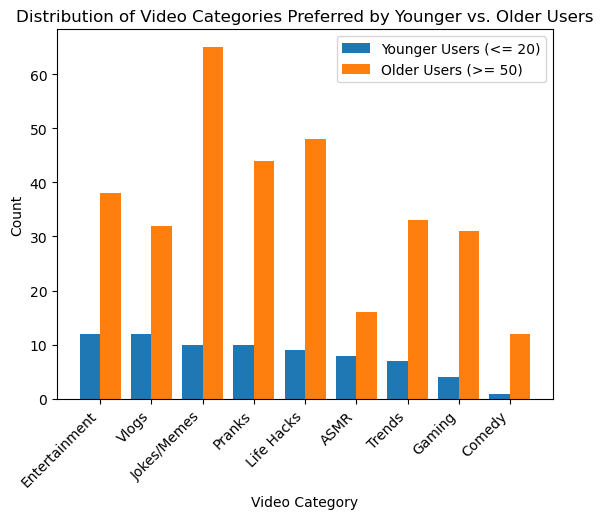

In [367]:
younger_users = social_media_data[social_media_data['Age'] <= 20]
older_users = social_media_data[social_media_data['Age'] >= 50]

younger_video_categories = younger_users['Video Category'].value_counts().reset_index()
younger_video_categories.columns = ['Video Category', 'Count (Younger)']

older_video_categories = older_users['Video Category'].value_counts().reset_index()
older_video_categories.columns = ['Video Category', 'Count (Older)']

video_category_comparison = pd.merge(younger_video_categories, older_video_categories, 
                                     on='Video Category', how='outer').fillna(0)
index = range(len(video_category_comparison))
bar_width = 0.4

plt.bar(index, video_category_comparison['Count (Younger)'], width=bar_width, label='Younger Users (<= 20)')
plt.bar([i + bar_width for i in index], video_category_comparison['Count (Older)'], width=bar_width, label='Older Users (>= 50)')

plt.xlabel('Video Category'), plt.ylabel('Count'), plt.title('Distribution of Video Categories Preferred by Younger vs. Older Users')
plt.xticks([i + bar_width / 2 for i in index], video_category_comparison['Video Category'], rotation=45, ha="right"), plt.legend();

> Based on the graph above we see Jokes/Memes, Life Hacks, and Pranks are the top 3 categories among older users while Entertainment, Vlogs and Jokes/Memes were the top 3 most popular genres for younger audiences.

3. What platforms are more popular with younger users (up to or below age 20)? What platforms are more popular with older users? Create a plot of table of the distributions of platforms preferred by younger vs. older users.

In [376]:
younger_platforms = younger_users['Platform'].value_counts().reset_index()
younger_platforms.columns = ['Platform', 'Count (Younger)']

older_platforms = older_users['Platform'].value_counts().reset_index()
older_platforms.columns = ['Platform', 'Count (Older)']

platform_comparison = pd.merge(younger_platforms, older_platforms, 
                                     on='Platform', how='outer').fillna(0)
platform_comparison

,Platform,Count (Younger),Count (Older)
0,YouTube,23,88
1,TikTok,22,88
2,Facebook,15,63
3,Instagram,13,80


> Based on our table, we see YouTube is the predominant platform for younger users (up to or below age 20), barely beating out tiktok by 1 user. Meanwhile, Youtube and Tiktok are tied and most popular for older users.